# <u>Artificial Neural Networks to Predict Concrete Compressive Strenght</u>

## Project Overview

This project aims to predict concrete compressive strength using an Artificial Neural Network (ANN) based on the mixture components and age of concrete. The model will utilize eight input variables, including cement, water, aggregates, and age, to estimate the concrete’s compressive strength. The insights gained from this model can assist in optimizing concrete mixtures and ensuring the desired strength for construction applications.

Dataset: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

## Project Owner: Manuel Contreras

### 1 - Libraries

In [44]:
import pandas as pd
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [45]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

### 2 - Dataset Import, Feature Computation and Data Cleaning

In [46]:
file_path = r'C:\Users\manue\Desktop\DataScience\Datasets\Concrete_Data_2.xlsx'
df = pd.read_excel(file_path)
print(df.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [47]:
df.shape

(1030, 9)

In [48]:
rows, columns = df.shape
print(f"The dataset has {columns} columns and {rows} rows.")

The dataset has 9 columns and 1030 rows.


In [49]:
column_names = df.columns.values
column_names

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [50]:
# To simplify future coding I will shorten the name of the columns
df.rename(columns=lambda x: x.split('(')[0].strip(), inplace=True)
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Normalizes spaces

# updated column names
print(df.columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')


In [51]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### Data Cleaning

In [52]:
# Null values
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

In [53]:
# There are some NaN string values that will bug the algorithm. To process them, first they need to be converted to actual np.nan values
df.replace('NaN', np.nan, inplace=True)

# Now check for NaN values in each column
nan_counts = df.isnull().sum()
print(nan_counts)

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64


#### Duplicates Handling

In [54]:
duplicates = df.duplicated().sum()
print(f"There are {duplicates} duplicated rows.")

There are 25 duplicated rows.


In [55]:
# Remove duplicate rows while keeping the first occurrence and modify the DataFrame in place
df.drop_duplicates(inplace=True)

rows, columns = df.shape
print(f"The dataset after dropping the null values and eliminating duplicates has {columns} columns and {rows} rows.")

The dataset after dropping the null values and eliminating duplicates has 9 columns and 1005 rows.


In [56]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [57]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


I do not see any datapoint that I could consider a huge outlier, so no need to eliminate any of them.

### 4 - Exploratory Data Analysis

#### Distribution of Concrete Compressive Strenght

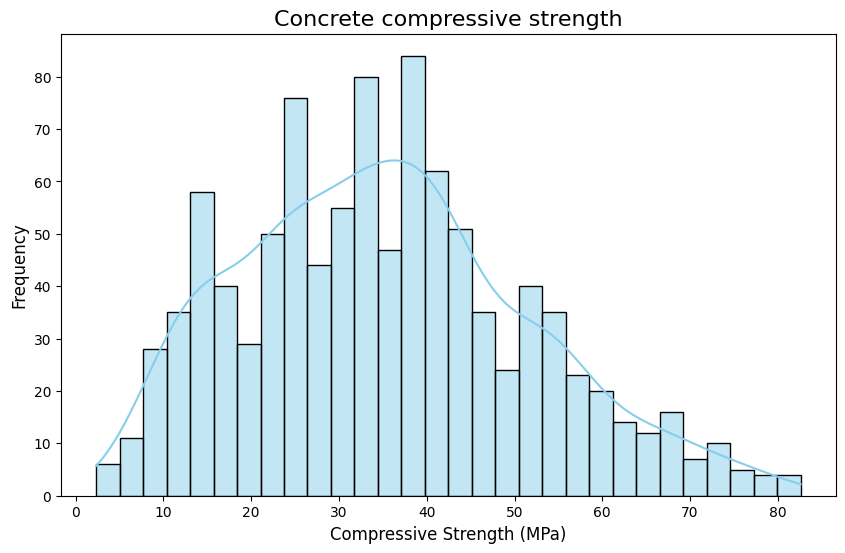

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Concrete compressive strength'], kde=True, color='skyblue', bins=30)

plt.title('Concrete compressive strength', fontsize=16)
plt.xlabel('Compressive Strength (MPa)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.show()

As we can see above, the compressive strenght follows a normal distribution. 

#### Correlation Matrix

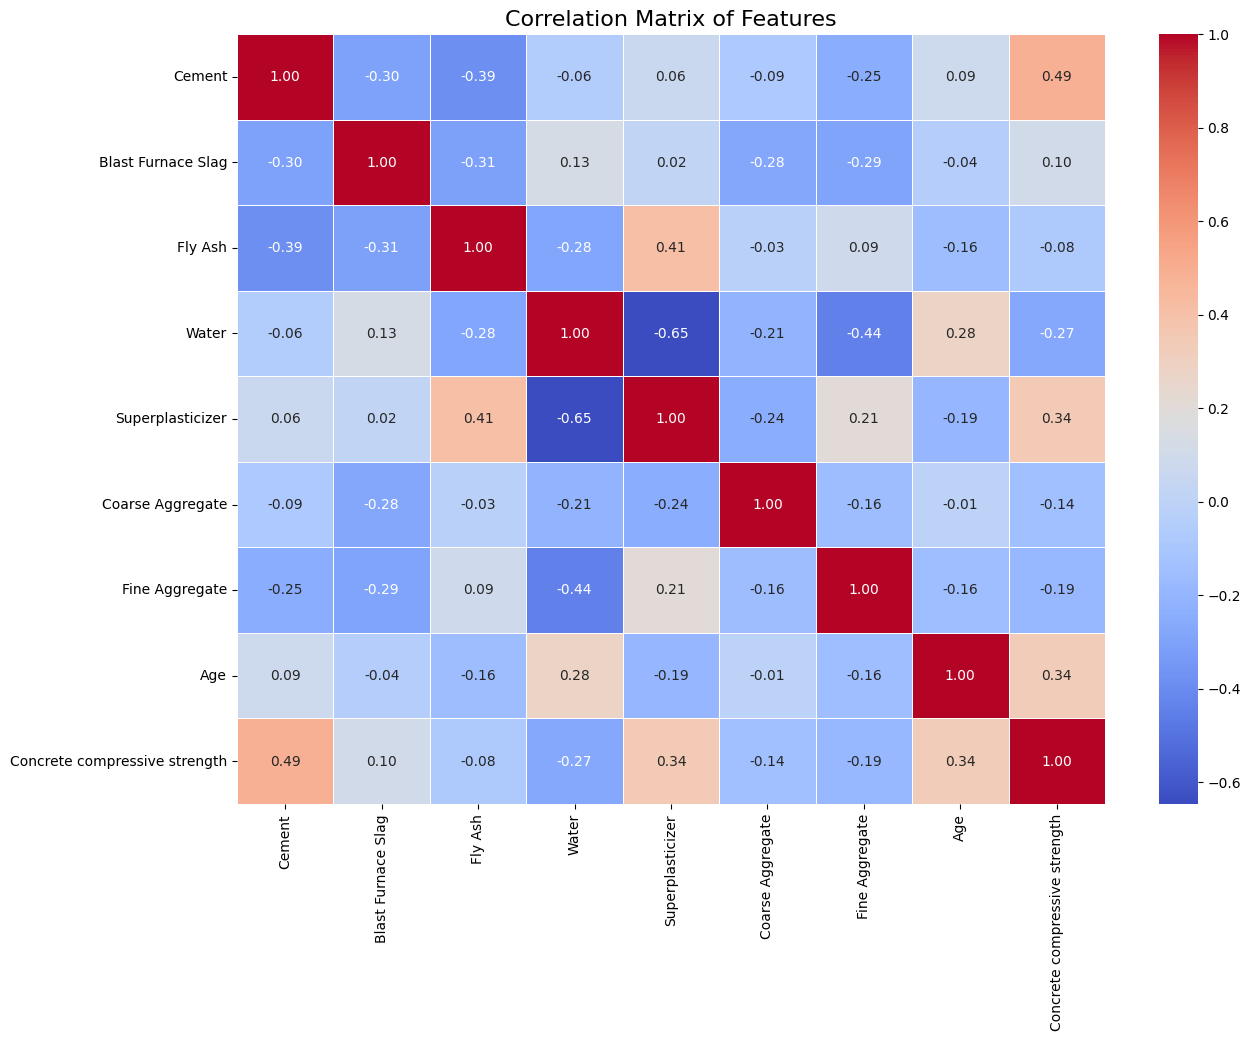

In [59]:
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))  

# heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

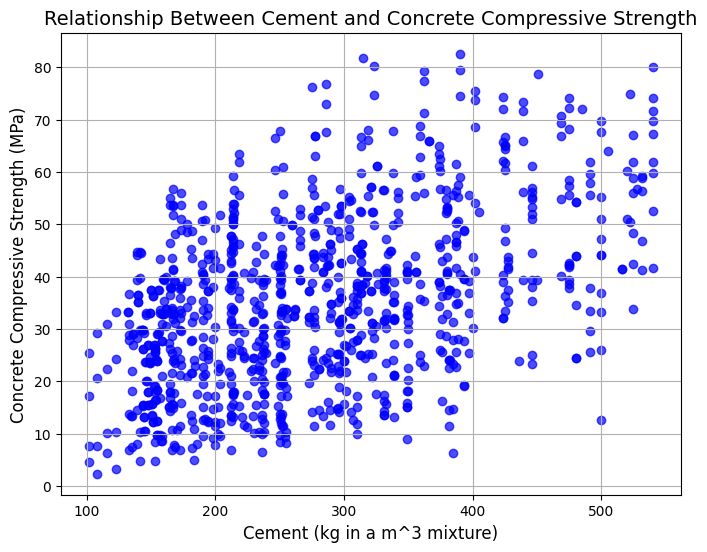

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Cement'], df['Concrete compressive strength'], color='b', alpha=0.7)
plt.title('Relationship Between Cement and Concrete Compressive Strength', fontsize=14)
plt.xlabel('Cement (kg in a m^3 mixture)', fontsize=12)
plt.ylabel('Concrete Compressive Strength (MPa)', fontsize=12)
plt.grid(True)
plt.show()

The amount of cement, superplasticizer, and age exhibit a positive correlation with the compressive strength of the concrete. This suggests that higher concentrations of these components, as well as increased curing time, tend to improve the strength of the concrete. Conversely, the amount of water and fine aggregate show a negative correlation with compressive strength, indicating that excessive water content or the presence of more fine aggregates may weaken the concrete mixture.

# 5 - Implementation of Different Models

In [61]:
X = df.drop(columns=['Concrete compressive strength'])
y = df['Concrete compressive strength']

In [62]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=48)

# 5.0 - Neural Network 

In [64]:
# First Neural Network model
model = models.Sequential()

In [65]:
# input layer (input_dim should match the number of features in X)
model.add(layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# hidden layers
model.add(layers.Dense(32, activation='relu'))

# Output layer for regression
model.add(layers.Dense(1, activation='linear'))

c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
# Model training
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1399.4124 - val_loss: 1360.0974
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1287.9656 - val_loss: 1185.2289
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1206.6813 - val_loss: 842.1973
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 774.7385 - val_loss: 422.1219
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 375.1266 - val_loss: 235.5625
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 220.6963 - val_loss: 227.6132
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236.4091 - val_loss: 217.6019
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 238.3044 - val_loss: 208.6912
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 214.8670 - val_loss: 200.7776
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 229.5737 - val_loss: 192.3251
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205.1342 - val_loss: 183.9218
Epoch 12/200


In [68]:
# Model evaluation on the Loss
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.3252  
Test loss: 40.395416259765625


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


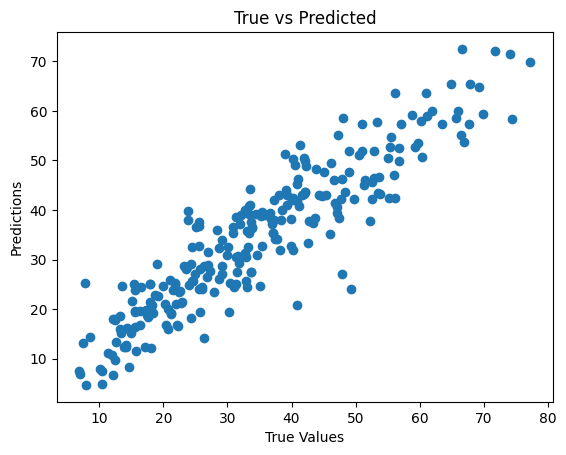

In [69]:
# Predict on the test data
predictions = model.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
plt.show()

In [70]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error between predicted and real values:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

percentage_error = (rmse / np.mean(y_test)) * 100
print(f"Percentage Error: {percentage_error}%")

Mean Squared Error between predicted and real values: 40.39541588063678
Root Mean Squared Error (RMSE): 6.355738814696273
Percentage Error: 18.29986246598334%


# 5.1 - Neural Network with Dropout and regularization

In [71]:
model = models.Sequential()

In [72]:
# Input layer
model.add(layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout for regularization
model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='linear'))

c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1487.8241 - val_loss: 1353.3674
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1322.3113 - val_loss: 841.8937
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 672.6404 - val_loss: 245.3726
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 247.0797 - val_loss: 204.0054
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227.3944 - val_loss: 183.7399
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 202.7789 - val_loss: 164.2677
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.5482 - val_loss: 155.8625
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.3428 - val_loss: 133.5474
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 145.4857 - val_loss: 123.5969
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149.8358 - val_loss: 116.4080
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 131.6130 - val_loss: 112.5404
Epoch 12/300
2

In [75]:
# Model evaluation
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.9505 
Test loss: 28.521089553833008


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


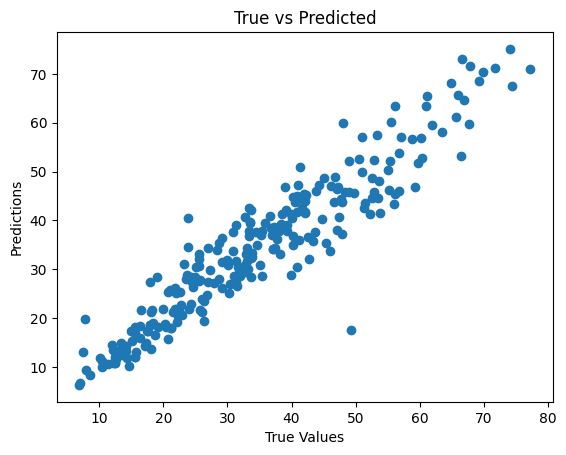

In [76]:
# Prediction on the test data
predictions = model.predict(X_test_scaled)

# Plot True vs Predicted
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
plt.show()

In [77]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error between predicted and real values:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

percentage_error = (rmse / np.mean(y_test)) * 100
print(f"Percentage Error: {percentage_error}%")

Mean Squared Error between predicted and real values: 28.521089871981154
Root Mean Squared Error (RMSE): 5.3405140082187925
Percentage Error: 15.376760231569028%


# 5.2 - Deeper Neural Network with Batch Normalization and Early Stopping

In [78]:
model = models.Sequential()

In [79]:
# Input layer
model.add(layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(layers.BatchNormalization())  # Batch normalization

# Hidden layers with Batch Normalization and Dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(1, activation='linear'))

c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [81]:
# Add Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [82]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 1490.6772 - val_loss: 1435.7977
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1423.5380 - val_loss: 1384.7040
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1324.9061 - val_loss: 1295.0469
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1342.6282 - val_loss: 1196.2805
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1205.6459 - val_loss: 1097.7811
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1229.5303 - val_loss: 980.2626
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1131.0282 - val_loss: 888.3746
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1047.0399 - val_loss: 804.6731
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1024.1840 - val_loss: 687.3771
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 972.5461 - val_loss: 619.9526
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 871.7417 - val_loss: 558.8520
Epoc

In [83]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.3867 
Test loss: 22.909746170043945


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


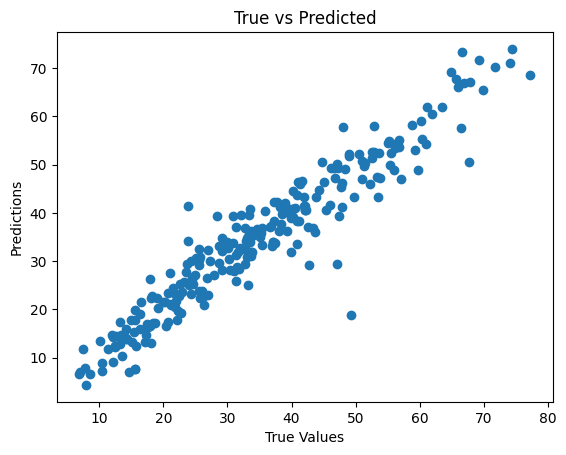

In [84]:
# Predict on the test data
predictions = model.predict(X_test_scaled)

# Plot True vs Predicted
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
plt.show()

In [85]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error between predicted and real values:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

percentage_error = (rmse / np.mean(y_test)) * 100
print(f"Percentage Error: {percentage_error}%")

Mean Squared Error between predicted and real values: 22.909744988572793
Root Mean Squared Error (RMSE): 4.786412538485665
Percentage Error: 13.78135472735464%


In [86]:
import pandas as pd

# Create a DataFrame with the real values (y_test), predicted values, and the difference
results_df = pd.DataFrame({
    'Real Values': y_test,
    'Predicted Values': predictions.flatten(),  # Flatten the predicted values to match the shape of y_test
    'Difference': y_test - predictions.flatten()
})

# Show the first few rows of the DataFrame
results_df.head(20)

,Real Values,Predicted Values,Difference
323,51.055698,50.665726,0.389972
737,17.540269,16.327150,1.213119
903,12.458831,12.477831,-0.019000
775,22.435549,22.757423,-0.321874
204,12.472621,12.233597,0.239024
578,17.200358,14.693095,2.507263
135,65.996643,66.006248,-0.009606
515,21.966705,21.640408,0.326298
343,56.743875,55.038826,1.705049
104,33.398217,35.590843,-2.192626


# 5.3 - Deeper Neural Network with Batch Normalization , Early Stopping and L2 Regularizer

In [87]:
model = models.Sequential()

In [88]:
# Input layer with L2 regularization
model.add(layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', 
                       kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())  # Batch normalization

# Hidden layers with L2 regularization and Dropout for regularization
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

# Output layer
model.add(layers.Dense(1, activation='linear'))

c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

In [90]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [91]:
# Model training
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, 
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 1568.1853 - val_loss: 1439.9242
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1438.1562 - val_loss: 1418.2378
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1324.2698 - val_loss: 1372.9303
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1270.9155 - val_loss: 1309.3539
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1270.8866 - val_loss: 1239.7802
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1161.4535 - val_loss: 1167.6768
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1142.8170 - val_loss: 1082.0577
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1035.4791 - val_loss: 998.2465
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1020.6325 - val_loss: 904.2795
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 946.1767 - val_loss: 827.8781
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 882.6760 - val_loss: 735.5526
E

In [92]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.5475 
Test loss: 21.481895446777344


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


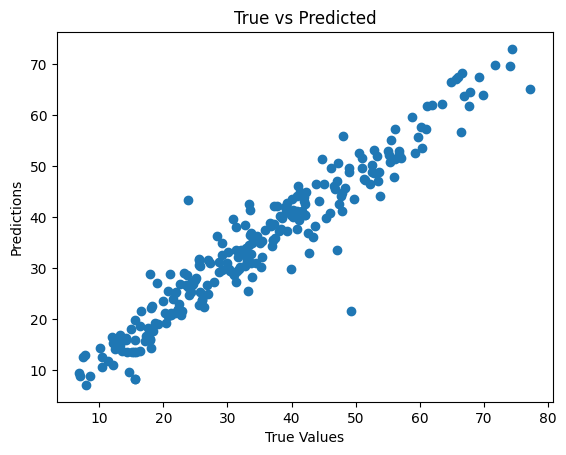

In [93]:
# Prediction
predictions = model.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
plt.show()

In [94]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error between predicted and real values:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

percentage_error = (rmse / np.mean(y_test)) * 100
print(f"Percentage Error: {percentage_error}%")

Mean Squared Error between predicted and real values: 19.42534190930143
Root Mean Squared Error (RMSE): 4.407418962306786
Percentage Error: 12.69013142165055%
